In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mlflow

In [3]:
mlflow.set_tracking_uri("http://localhost:5000")
results = mlflow.search_runs()

In [27]:
for c in results.columns:
    if c[:7] == 'params.':
        results = results.rename(columns={c:c[7:]})
results = results.rename(columns={'metrics.f1_val' : 'f1_val', 'metrics.f1' : 'f1'})
results.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.accuracy', 'metrics.recall', 'metrics.precision',
       'metrics.roc', 'f1', 'f1_val', 'metrics.training_accuracy_score',
       'metrics.training_log_loss', 'metrics.training_recall_score',
       'metrics.training_roc_auc', 'metrics.training_score',
       'metrics.training_precision_score', 'metrics.training_f1_score',
       'model', 'random_i', 'stage', 'units', 'learning_rate', 'epochs',
       'type', 'activation', 'preprocessing', 'model_selection', 'dropout',
       'batch', 'n_neighbors', 'metric', 'C', 'kernel', 'n_estimators',
       'radius', 'class_weight', 'max_depth', 'criterion', 'min_samples_split',
       'random_state', 'metric_params', 'max_features', 'n_jobs',
       'min_impurity_decrease', 'min_samples_leaf', 'splitter',
       'max_leaf_nodes', 'ccp_alpha', 'min_weight_fraction_leaf', 'p',
       'leaf_size', 'algorithm', 'base_estimator', 'estimator',
       

In [31]:
# filtrar por modelo lstm e que tenha f1_val
lstm_results = results.query("model == 'lstm' and f1_val.notnull()")
lstm_results


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,metrics.recall,metrics.precision,metrics.roc,...,sampling_strategy,features_i,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.source.git.commit,tags.estimator_class,tags.estimator_name,tags.mlflow.log-model.history
10,e1baa3ded1054111b14d72e9a950fc01,0,FINISHED,mlflow-artifacts:/0/e1baa3ded1054111b14d72e9a9...,2023-05-19 20:17:29.550000+00:00,2023-05-19 20:36:10.711000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,indecisive-mole-16,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
11,e447c689744f4ef88c515fd7d846a60b,0,FINISHED,mlflow-artifacts:/0/e447c689744f4ef88c515fd7d8...,2023-05-19 20:14:23.251000+00:00,2023-05-19 20:17:29.400000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,gaudy-ant-251,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
12,34fd2ca4ad6a433d8e18be8849b00e14,0,FINISHED,mlflow-artifacts:/0/34fd2ca4ad6a433d8e18be8849...,2023-05-19 20:04:39.074000+00:00,2023-05-19 20:14:23.073000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,youthful-fawn-549,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
13,32a8a57b4f3f4f8399bd8215cfa38461,0,FINISHED,mlflow-artifacts:/0/32a8a57b4f3f4f8399bd8215cf...,2023-05-19 19:50:38.195000+00:00,2023-05-19 20:04:38.898000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,adorable-crab-412,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
14,2d5914f1567b498fa24561b714e0c536,0,FINISHED,mlflow-artifacts:/0/2d5914f1567b498fa24561b714...,2023-05-19 19:15:40.656000+00:00,2023-05-19 19:50:38.033000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,bald-carp-815,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,4f18e4cea9e14c2baccbfe48de699106,0,FINISHED,mlflow-artifacts:/0/4f18e4cea9e14c2baccbfe48de...,2023-05-17 15:03:10.238000+00:00,2023-05-17 15:07:08.112000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,able-gull-178,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
306,99e98a063a6948f0baad8bc7c2da7d84,0,FINISHED,mlflow-artifacts:/0/99e98a063a6948f0baad8bc7c2...,2023-05-17 14:55:52.834000+00:00,2023-05-17 15:03:10.100000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,indecisive-bass-614,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
307,a68da1dd7e9c4100931f0def0a4f91bd,0,FINISHED,mlflow-artifacts:/0/a68da1dd7e9c4100931f0def0a...,2023-05-17 14:52:11.660000+00:00,2023-05-17 14:55:52.734000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,rare-toad-856,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None
308,e1cbc513776044c2a426d68ff90019b0,0,FINISHED,mlflow-artifacts:/0/e1cbc513776044c2a426d68ff9...,2023-05-17 14:50:05.238000+00:00,2023-05-17 14:52:11.551000+00:00,NaN,NaN,NaN,NaN,...,None,None,LOCAL,pc-daniel,casual-stag-882,C:\Users\pc-daniel\anaconda3\envs\tf-gpu\lib\s...,None,None,None,None


## Analisando os resultados por parametros

Parametros:

- Função de ativação
- Unidades
- Batch
- Epocas
- Dropout
- Taxa de aprendizado
- Preprocessamento

/tmp/ipykernel_29075/2475814376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_results[param] = lstm_results[param].astype(float)


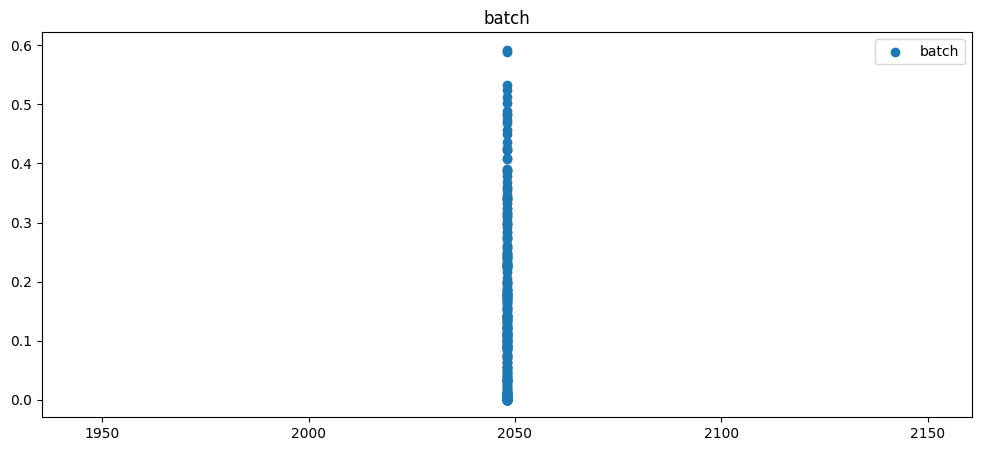

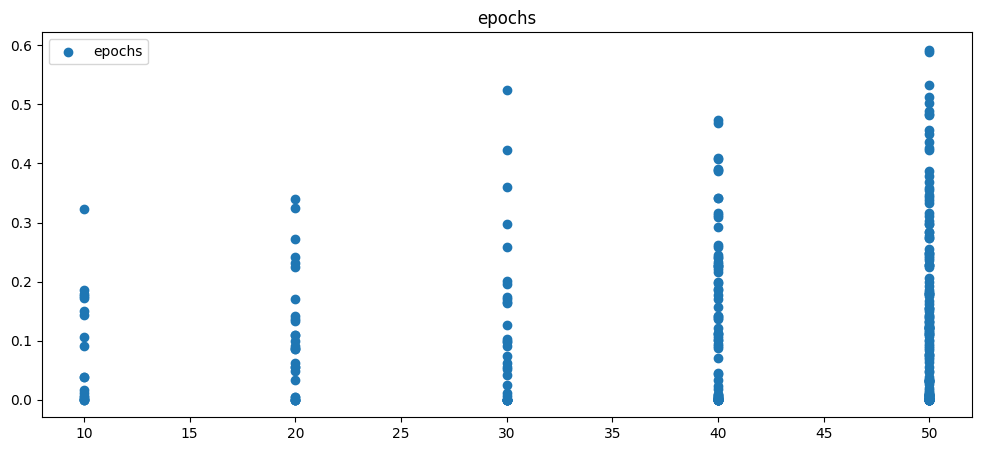

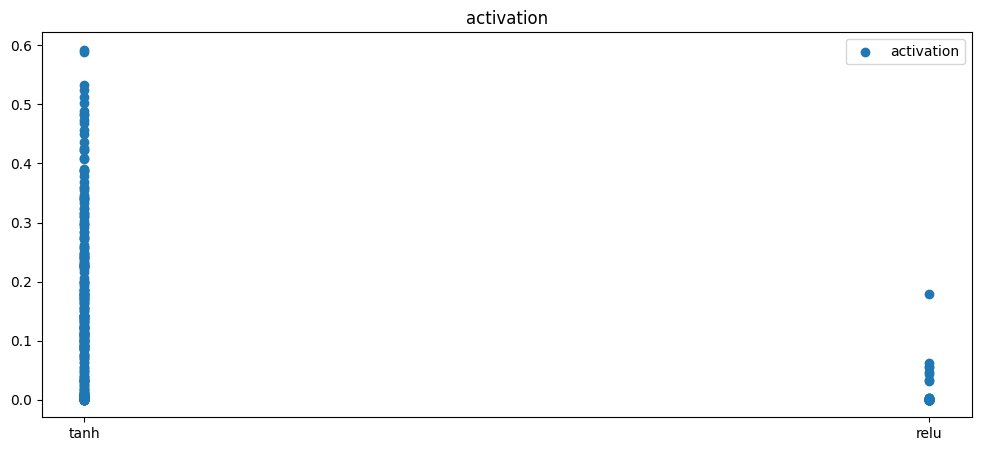

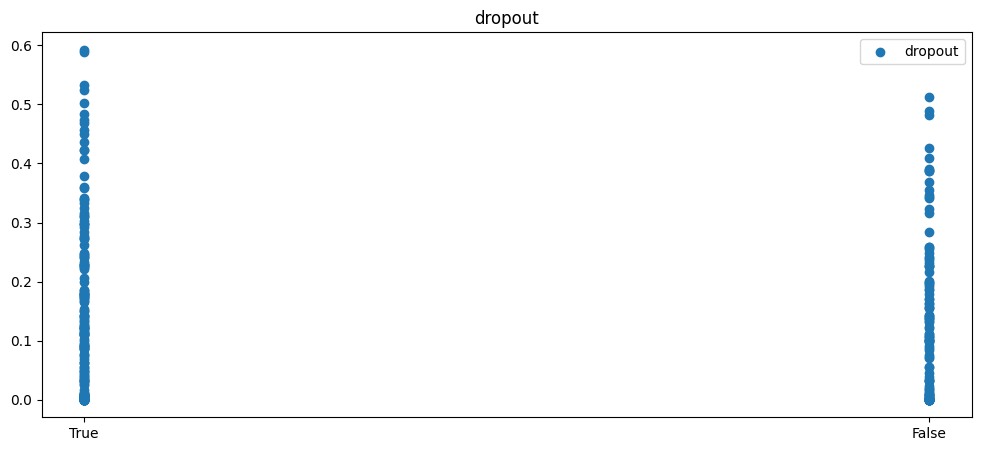

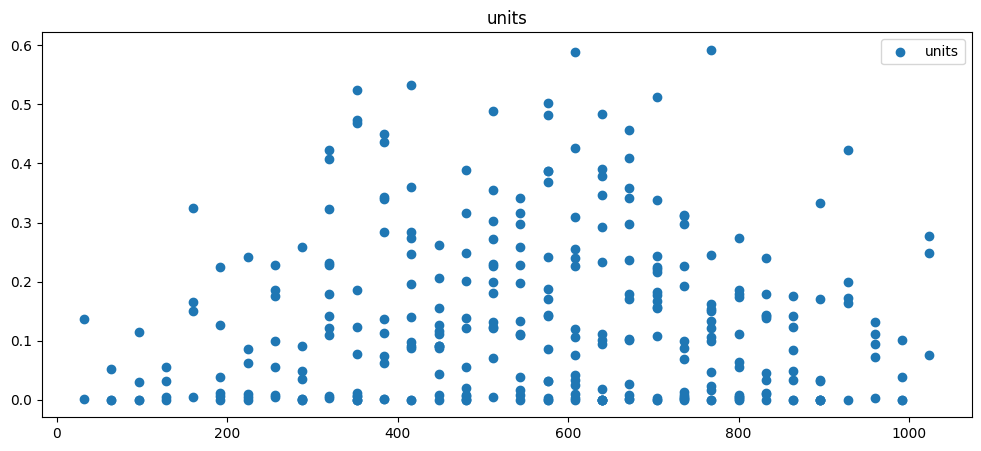

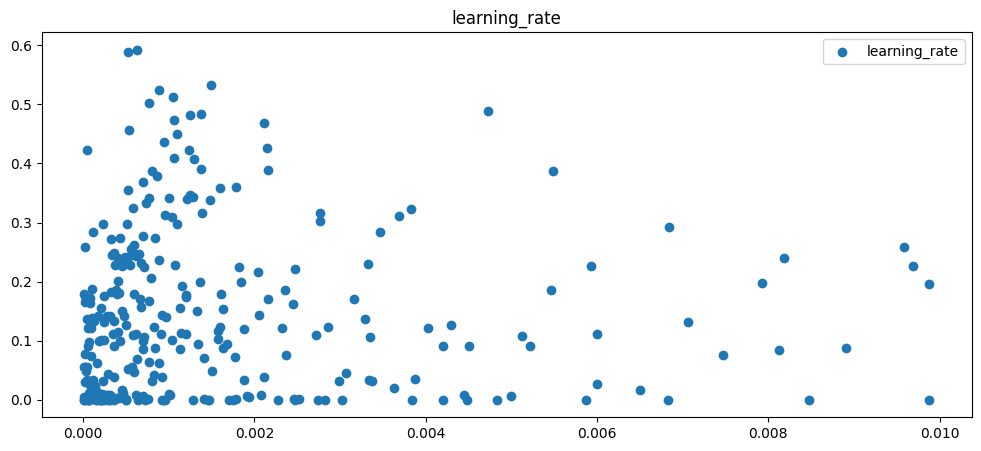

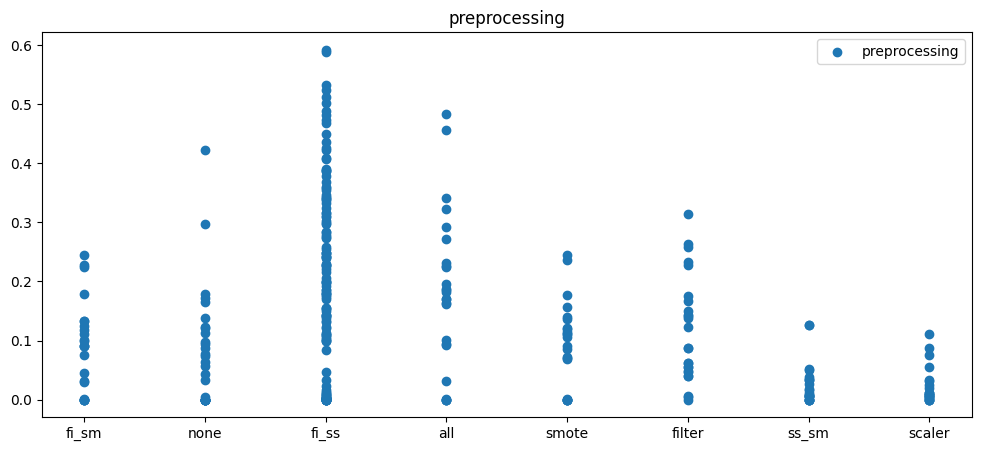

In [38]:
params = ['batch', 'epochs', 'activation', 'dropout', 'units', 'learning_rate', 'preprocessing']

# Apresentando os resultados por parametro
for param in params:
    plt.figure(figsize=(12,5))
    plt.title(param)
    if param in ['batch', 'epochs', 'units', 'learning_rate']:
        lstm_results[param] = lstm_results[param].astype(float)
    plt.scatter(lstm_results[param], lstm_results['f1_val'], label=param)
    plt.legend()
    plt.show()
    